In [1]:
import numpy as np
import pandas as pd

import utils_data_prepping as udp
import utils_eda as eda
import utils_reg_models as reg

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/yeh-concret-data/Concrete_Data_Yeh.csv


# Data Loading 

In [2]:
df = udp.loading('/kaggle/input/yeh-concret-data/Concrete_Data_Yeh.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [3]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Missing values account for 0.00% in dataframe
cement has the most missing values lacking 0.00% of its data
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


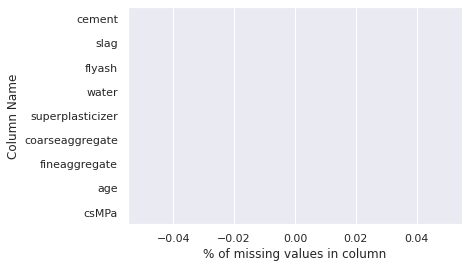

In [5]:
udp.missing_values(df)

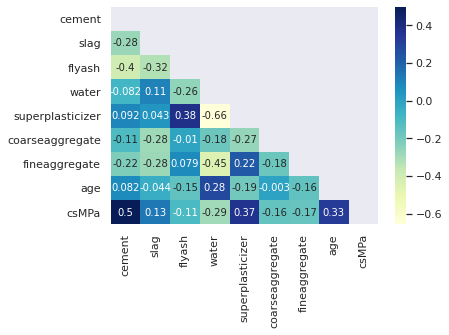

In [6]:
eda.corr_matrix(df)

# Exploration Data Analysis

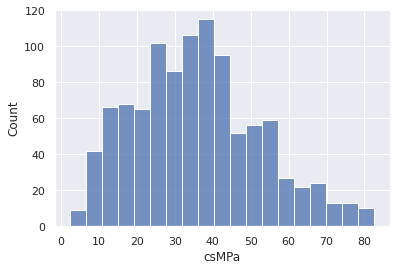

In [7]:
eda.distribution(df, "csMPa")

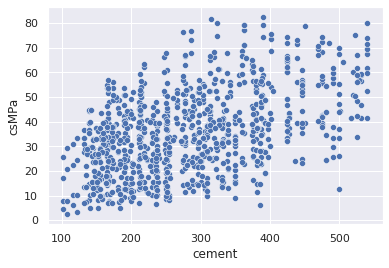

In [8]:
sns.scatterplot(data=df, x='cement', y='csMPa')
plt.show()

# Model Building & Evaluation

In [9]:
X, y = udp.pre_processing(df, 'csMPa')
X, y

(array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
        [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
        [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
        ...,
        [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
        [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
        [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]]),
 array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ]))

## Multiple Linear Regression

In [10]:
lin = reg.Regressor(X, y, 'lin')

### Model Evalution 1: Train_test_split 

In [11]:
max_scores = {}
for i in np.arange(0.15, 0.45, 0.05):
    i = round(i, 4)
    scores_i = []
    for j in range(0, 150):
        lin.preprocess_split(size=i, state=j)
        lin.fit_predict(reg_kwargs = {'normalize': True})
        mets = lin.metrics()
        scores_i.append(mets[-2])
    i_max = max(scores_i)
    max_index = scores_i.index(i_max)
    max_scores[(i, max_index)] = round(i_max, 4)
    
v=list(max_scores.values())
k=list(max_scores.keys())
print(k[v.index(max(v))], max(v))

(0.15, 119) 0.7203


### Model Evaluation 2: Cross-validation

In [12]:
lin.preprocess_cv(k=3)
lin.fit_predict()
lin.metrics()

54.84% accuracy with a standard deviation of 0.052


## Polynomial Regression

In [13]:
poly = reg.Regressor(X, y, 'poly', poly_degree=3)

### Model Evalution 1: Train_test_split 

In [14]:
max_scores = {}
for i in np.arange(0.15, 0.45, 0.05):
    i = round(i, 4)
    scores_i = []
    for j in range(0, 150):
        poly.preprocess_split(size=i, state=j)
        poly.fit_predict(reg_kwargs = {'normalize': True})
        mets = poly.metrics()
        scores_i.append(mets[-2])
    i_max = max(scores_i)
    max_index = scores_i.index(i_max)
    max_scores[(i, max_index)] = round(i_max, 4)

v=list(max_scores.values())
k=list(max_scores.keys())
print(k[v.index(max(v))], max(v))

(0.2, 138) 0.9117


### Model Evaluation 2: Cross-validation

In [15]:
poly.preprocess_cv(k=20)
poly.fit_predict()
poly.metrics()

41.21% accuracy with a standard deviation of 0.61
